Лабораторная работа №2 "Классификация с помощью логистической регрессии"

In [198]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

1. Загрузить данные из файла heart.csv, используя функцию read_csv() библиотеки pandas.  Более подробная информация о датасете https://www.kaggle.com/fedesoriano/heart-failure-prediction

In [199]:
df = pd.read_csv('heart.csv')

2. Проверить сбалансированность выборки (Сколько объектов класса "1" и "0" соответственно). Можно воспользоваться методом value_counts()

In [200]:
print(df['HeartDisease'].value_counts())

HeartDisease
1    508
0    410
Name: count, dtype: int64


3. Выделить качественные признаки, провести их кодирование. Для этого можно воспользоваться фунцией get_dummies() библиотеки pandas

In [201]:
columns_to_encode = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

# Кодирование качественных признаков
for column in columns_to_encode:
    df[column] = pd.factorize(df[column])[0]

print("\nДатасет после кодирования:")
print(df)


Датасет после кодирования:
     Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0     40    0              0        140          289          0           0   
1     49    1              1        160          180          0           0   
2     37    0              0        130          283          0           1   
3     48    1              2        138          214          0           0   
4     54    0              1        150          195          0           0   
..   ...  ...            ...        ...          ...        ...         ...   
913   45    0              3        110          264          0           0   
914   68    0              2        144          193          1           0   
915   57    0              2        130          131          0           0   
916   57    1              0        130          236          0           2   
917   38    0              1        138          175          0           0   

     MaxHR  ExerciseAng

4. Провести нормирование всех количественных признаков. В данном случае, чтобы не изменились значения кодированных качественных признаков можно использовать класс MinMaxScaler(), либо способ из прошлой работы. Отделить входные данные от разметки.

In [202]:
from sklearn.preprocessing import MinMaxScaler

numerical_features = df.select_dtypes(include=['number'])

X = numerical_features.drop('HeartDisease', axis=1)
Y = numerical_features['HeartDisease']

def normalization(X):
    X_mean = np.mean(X, axis=0)
    X_std = np.std(X, axis=0)
    
    X_std[X_std == 0] = 1
    
    X_normalized = (X - X_mean) / X_std
    return X_normalized

X_norm = normalization(X)

print("\nНормированные данные:")
print(X_norm)

print("\nРазметка:")
print(Y)


Нормированные данные:
          Age       Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  \
0   -1.433140 -0.515952      -1.705573   0.410909     0.825070  -0.551341   
1   -0.478484  1.938163      -0.530992   1.491752    -0.171961  -0.551341   
2   -1.751359 -0.515952      -1.705573  -0.129513     0.770188  -0.551341   
3   -0.584556  1.938163       0.643588   0.302825     0.139040  -0.551341   
4    0.051881 -0.515952      -0.530992   0.951331    -0.034755  -0.551341   
..        ...       ...            ...        ...          ...        ...   
913 -0.902775 -0.515952       1.818169  -1.210356     0.596393  -0.551341   
914  1.536902 -0.515952       0.643588   0.627078    -0.053049   1.813758   
915  0.370100 -0.515952       0.643588  -0.129513    -0.620168  -0.551341   
916  0.370100  1.938163      -1.705573  -0.129513     0.340275  -0.551341   
917 -1.645286 -0.515952      -0.530992   0.302825    -0.217696  -0.551341   

     RestingECG     MaxHR  ExerciseAngina   Oldpeak 

5. Разделить выборку на обучающую и тестовую в соотношении 0.6:0.2:0.2, используя функцию train_test_split(). Параметр рандомизации задать random_state = 13 для возможности сравнения результатов. Проверить сбалансированность классов в полученных выборках.

In [203]:
from sklearn.model_selection import train_test_split

Y=df['HeartDisease']

X_train, X_temp, Y_train, Y_temp = train_test_split(X_norm, Y, test_size = 0.4, random_state = 13)

X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size = 0.5, random_state = 13)

def check_class_balance(Y):
    class_counts = Y.value_counts()
    print(f"Количество примеров в каждом классе: {class_counts}")

print("Обучающая выборка:")
check_class_balance(Y_train)

print("\nВалидационная выборка:")
check_class_balance(Y_val)

print("\nТестовая выборка:")
check_class_balance(Y_test)

Обучающая выборка:
Количество примеров в каждом классе: HeartDisease
1    302
0    248
Name: count, dtype: int64

Валидационная выборка:
Количество примеров в каждом классе: HeartDisease
1    96
0    88
Name: count, dtype: int64

Тестовая выборка:
Количество примеров в каждом классе: HeartDisease
1    110
0     74
Name: count, dtype: int64


In [204]:
X_train.shape, X_test.shape

((550, 11), (184, 11))

6. Обучить классификатор на основе логистической регрессии. Использовать класс по вариантам: 1 - LogisticRegression; 2 - SGDClassifier. Процедуру регуляризации не проводить. Рассчитать предсказанные значения классов для тестовой выборки.

In [205]:
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

def _SGDClassifier():
    model = LogisticRegression(solver='lbfgs', penalty=None) 
    return model

def _LogisticRegression():
    model = SGDClassifier(loss='log_loss', penalty=None)
    return model

model = _LogisticRegression()
model.fit(X_train, Y_train)

y_pred = model.predict(X_test)
print(y_pred)


[1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 1 1 1 1 1 1
 1 0 0 0 1 0 0 1 1 1 0 1 1 0 1 1 0 1 0 0 1 0 1 1 0 1 1 0 0 1 0 1 1 1 1 1 0
 1 0 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 0 1 0 1 0 0 1 1 1 1 0
 0 1 0 1 1 0 0 1 1 1 0 0 0 1 0 1 0 0 1 1 0 0 1 1 1 1 0 1 1 1 0 1 1 0 1 0 1
 1 1 1 0 0 1 1 1 1 1 0 1 1 0 1 0 1 0 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 0 0]


7. Рассчитать точность классификации, в качестве метрики использовать долю верных ответов модели с реальными значениями.

In [206]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(Y_test, y_pred)
print(f'Точность модели: {accuracy:.2f}')

Точность модели: 0.86


8. Для заданного в диапазоне $[0, 0.001, 0.01, 0.1, 1.0, 10]$ параметра регуляризации провести процедуру валидации, выбрать оптимальное значение гиперпараметра. Обучить модель при этом значении и рассчитать точность. Для обучения также использовать классы  LogisticRegression или SGDClassifier

In [207]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lamb = [0.001, 0.01, 0.1, 1.0, 10]

logreg = LogisticRegression(max_iter=100)

param_grid = {'C': lamb}
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy', error_score='raise')
grid_search.fit(X_train, Y_train)

best_lamd = grid_search.best_params_['C']
print("Лучшая лямбда: ", best_lamd)
                       
model = LogisticRegression(C = best_lamd, max_iter=1000)
model.fit(X_train, Y_train)

test_predict = model.predict(X_test)
best_acc_val = accuracy_score(Y_test, test_predict)
print("Точность предсказаний модели:", best_acc_val)

Лучшая лямбда:  0.001
Точность предсказаний модели: 0.8478260869565217


9. Для лучшей модели изобразить матрицу ошибок (confusion matrix)

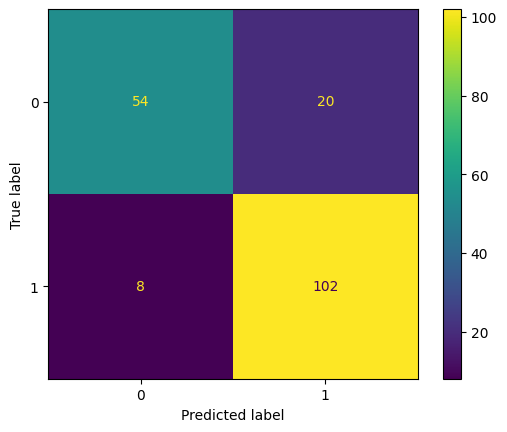

In [208]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, test_predict)
ConfusionMatrixDisplay(cm).plot()

10. Обучить модель, используя процедуру кросс-валидации с помощью класса LogisticRegressionCV. Предварительно нужно объединить тренировочную и валидационную выборку. Оценить точность модели.

In [209]:
from sklearn.linear_model import LogisticRegressionCV

X_train_val = np.concatenate((X_train, X_val))
Y_train_val = np.concatenate((Y_train, Y_val))

logreg_cv = LogisticRegressionCV(Cs = lamb, cv=5, max_iter=10000, scoring='accuracy')
logreg_cv.fit(X_train_val, Y_train_val)

y_pred = logreg_cv.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
print(f'Точность модели: {accuracy:.3f}')

Точность модели: 0.880


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegressionCV was fitted without feature names
  warnings.warn(


11. Для оценки точности построить ROC-кривую. Для этого рассчитать предсказанные вероятности по последней модели. Рассчитать значения оценок FPR и TPR с помощью функции roc_curve().

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegressionCV was fitted without feature names
  warnings.warn(


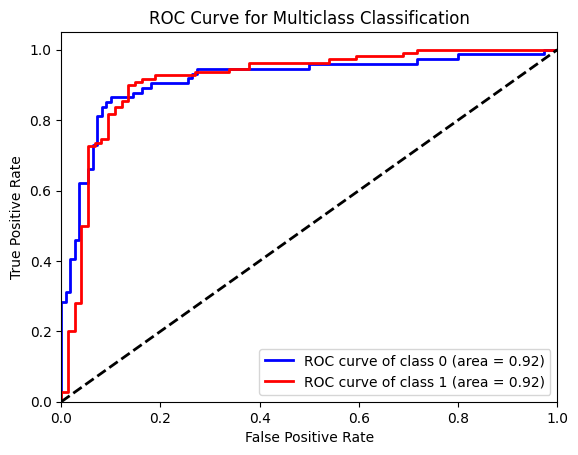

In [210]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay

y_pred_proba = logreg_cv.predict_proba(X_test)

# Для многоклассовой классификации используем метод "один против остальных" (OvR)
n_classes = len(np.unique(Y))
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test, y_pred_proba[:, i], pos_label=i)
    roc_auc[i] = roc_auc_score(Y_test == i, y_pred_proba[:, i])

# Построение ROC-кривой для каждого класса
plt.figure()
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiclass Classification')
plt.legend(loc="lower right")
plt.show()
